<a href="https://colab.research.google.com/github/Lafri-13/Adult-Census-Income-Classification/blob/main/CM2604_ML_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [389]:
!pip install ucimlrepo

# Description of Dataset

In [390]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [391]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [392]:
y

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
48837,<=50K.
48838,<=50K.
48839,<=50K.
48840,<=50K.


### Merging X and y together to handle null values together

In [393]:
X["income"] = y

In [394]:
X_data = X.copy()

In [395]:
X_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [396]:
X_data.shape

(48842, 15)

In [397]:
X_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### Checking and Forward Filling Null Values

In [398]:
X_data['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [399]:
X_data.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [400]:
X_data.eq("?").sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

### Changing '?' to NaN and

In [401]:
import numpy as np
X_data.replace('?', np.NaN, inplace=True)

In [402]:
X_data.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

Forward filling will fill the NaN values with the last obsereved non missing value

In [403]:
X_data.fillna(method = 'ffill', inplace=True)

In [404]:
X_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [405]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [406]:
X_data['income'].value_counts()

<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: income, dtype: int64

### Replace the string without the fullstops

In [407]:
X_data.loc[:, 'income'].replace('<=50K.','<=50K', regex=True, inplace=True)
X_data.loc[:, 'income'].replace('>50K.','>50K', regex=True, inplace=True)

In [408]:
X_data['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

## Checking the correlation

In [409]:
X_data_cor = X_data.copy()

In [410]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

X_data_cor['workclass'] = label_encoder.fit_transform(X_data_cor['workclass'])
X_data_cor['education'] = label_encoder.fit_transform(X_data_cor['education'])
X_data_cor['marital-status'] = label_encoder.fit_transform(X_data_cor['marital-status'])
X_data_cor['occupation'] = label_encoder.fit_transform(X_data_cor['occupation'])
X_data_cor['relationship'] = label_encoder.fit_transform(X_data_cor['relationship'])
X_data_cor['race'] = label_encoder.fit_transform(X_data_cor['race'])
X_data_cor['sex'] = label_encoder.fit_transform(X_data_cor['sex'])
X_data_cor['native-country'] = label_encoder.fit_transform(X_data_cor['native-country'])
X_data_cor['income'] = label_encoder.fit_transform(X_data_cor['income'])

X_data_cor


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,3,215419,9,13,0,9,1,4,0,0,0,36,38,0
48838,64,3,321403,11,9,6,9,2,2,1,0,0,40,38,0
48839,38,3,374983,9,13,2,9,0,4,1,0,0,50,38,0
48840,44,3,83891,9,13,0,0,3,1,1,5455,0,40,38,0


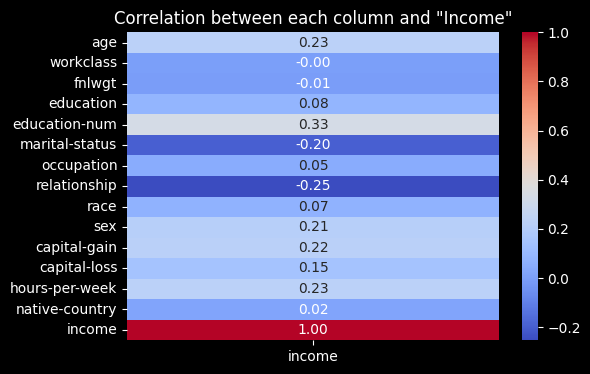

In [411]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = X_data_cor.corr()

income_cor = correlation_matrix['income']

plt.figure(figsize=(6, 4))
sns.heatmap(income_cor.to_frame(), annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title('Correlation between each column and "Income"')
plt.show()

## Preparing Data for Naive Bayes

### Gaussian Naive Bayes only Work with numeric values

so using label encoder to change strings to numaric values

In [412]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

X_data['workclass'] = label_encoder.fit_transform(X_data['workclass'])
X_data['education'] = label_encoder.fit_transform(X_data['education'])
X_data['marital-status'] = label_encoder.fit_transform(X_data['marital-status'])
X_data['occupation'] = label_encoder.fit_transform(X_data['occupation'])
X_data['relationship'] = label_encoder.fit_transform(X_data['relationship'])
X_data['race'] = label_encoder.fit_transform(X_data['race'])
X_data['sex'] = label_encoder.fit_transform(X_data['sex'])
X_data['native-country'] = label_encoder.fit_transform(X_data['native-country'])

X_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,<=50K
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,<=50K
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,<=50K
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,<=50K
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,3,215419,9,13,0,9,1,4,0,0,0,36,38,<=50K
48838,64,3,321403,11,9,6,9,2,2,1,0,0,40,38,<=50K
48839,38,3,374983,9,13,2,9,0,4,1,0,0,50,38,<=50K
48840,44,3,83891,9,13,0,0,3,1,1,5455,0,40,38,<=50K


In [413]:
y_data = X_data['income']
X_data = X_data.drop((['income']), axis=1)

In [414]:
X_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,3,215419,9,13,0,9,1,4,0,0,0,36,38
48838,64,3,321403,11,9,6,9,2,2,1,0,0,40,38
48839,38,3,374983,9,13,2,9,0,4,1,0,0,50,38
48840,44,3,83891,9,13,0,0,3,1,1,5455,0,40,38


test_size = 0.2 means 20% of the data will be tested while 80% of the data will be trained

In [415]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2)

# Gaussian Naive Bayes

In [416]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_prediction_gnb = gnb.predict(x_test)

In [417]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prediction_gnb))

              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.87      7395
        >50K       0.66      0.30      0.42      2374

    accuracy                           0.79      9769
   macro avg       0.74      0.63      0.64      9769
weighted avg       0.77      0.79      0.76      9769



In [418]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_prediction_gnb)*100)

79.3325826594329


In [419]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_prediction_gnb)

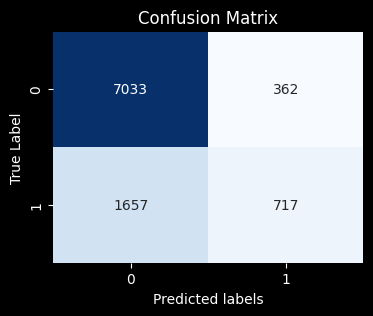

In [420]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap ='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [421]:
# Handle outliers and group the datas



import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix


# Precision-Recall Curve
precision_model1, recall_model1, _ = precision_recall_curve(true_labels, predictions_model1)
precision_model2, recall_model2, _ = precision_recall_curve(true_labels, predictions_model2)

plt.plot(recall_model1, precision_model1, label='Model 1')
plt.plot(recall_model2, precision_model2, label='Model 2')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

from sklearn.metrics import classification_report, precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np

# Example classification report
report = classification_report(y_test, y_prediction_gnb, output_dict=True)

# Extract F1 scores from the report
f1_scores = [report[label]['f1-score'] for label in report.keys() if label not in ['accuracy', 'macro avg', 'weighted avg']]

# Plot F1 scores
plt.bar(range(len(f1_scores)), f1_scores, color='blue')
plt.xlabel('Class Labels')
plt.ylabel('F1 Score')
plt.title('F1 Score for Each Class')
plt.xticks(np.arange(len(f1_scores)), report.keys(), rotation=45)
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1
plt.show()





NameError: name 'true_labels' is not defined